# Diabetes Prediction

### Data Collection and Pre-Processing

##### Importing Dependencies

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import QuantileTransformer
import pickle

##### Importing Datasets

In [193]:
df = pd.read_csv("E:\Multiple Disease Prediction\Datasets\diabetes.csv")

In [194]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [195]:
df.shape

(768, 9)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [197]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [198]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [199]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [200]:
for feature in df.columns:
    if feature in ['Outcome']:
        pass
    else:
        df[feature] = df[feature].replace(0,np.NaN)

In [201]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


##### Missing Values

In [202]:
for feature in df.columns:
    print(feature, df[feature].isnull().mean()*100)

Pregnancies 14.453125
Glucose 0.6510416666666667
BloodPressure 4.557291666666666
SkinThickness 29.557291666666668
Insulin 48.69791666666667
BMI 1.4322916666666665
DiabetesPedigreeFunction 0.0
Age 0.0
Outcome 0.0


In [203]:
#median
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [204]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [205]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### Duplicate Values

In [206]:
df.duplicated().sum()

0

##### Feature Engineering

In [207]:
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity_1", "Obesity_2", "Obesity_3"], dtype = "category")
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity_1
4      Obesity_2
5      Obesity_3
dtype: category
Categories (6, object): ['Normal', 'Obesity_1', 'Obesity_2', 'Obesity_3', 'Overweight', 'Underweight']

In [208]:
df['NewBMI'] = NewBMI
df.loc[df['BMI'] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df['BMI'] > 18.5) & (df['BMI'] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df['BMI'] > 24.9) & (df['BMI'] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df['BMI'] > 29.9) & (df['BMI'] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df['BMI'] > 34.9) & (df['BMI'] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df['BMI'] > 39.9, "NewBMI"] = NewBMI[5]


In [209]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity_1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity_3


In [210]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

In [211]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity_1,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity_3,Abnormal


In [212]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [213]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity_1,Abnormal,High
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,High
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity_3,Abnormal,High


In [214]:
# One Hot Encoding
df = pd.get_dummies(df, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity_1,NewBMI_Obesity_2,NewBMI_Obesity_3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,True,False,False,False,False,False,False,False,False
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,False,False,True,False,True,False,True,False
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,False,False,False,False,False,False,False,False,False
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,False,False,True,False,True,False,True,False
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,False,True,False,False,False,False,False,False


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   NewBMI_Obesity_1          768 non-null    bool   
 10  NewBMI_Obesity_2          768 non-null    bool   
 11  NewBMI_Obesity_3          768 non-null    bool   
 12  NewBMI_Overweight         768 non-null    bool   
 13  NewBMI_Underweight        768 non-null    bool   
 14  NewInsulin

In [216]:
df = df.replace({True:1, False:0})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity_1,NewBMI_Obesity_2,NewBMI_Obesity_3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0,0,0,0,0,0,0
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,0,1,0,1,0,1,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,0,0,0,0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,1,0,1,0,1,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0


In [217]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity_1',
       'NewBMI_Obesity_2', 'NewBMI_Obesity_3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight'],
      dtype='object')

##### Normalization

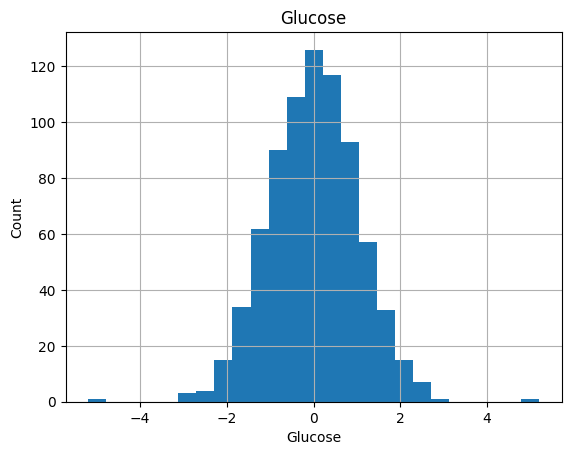

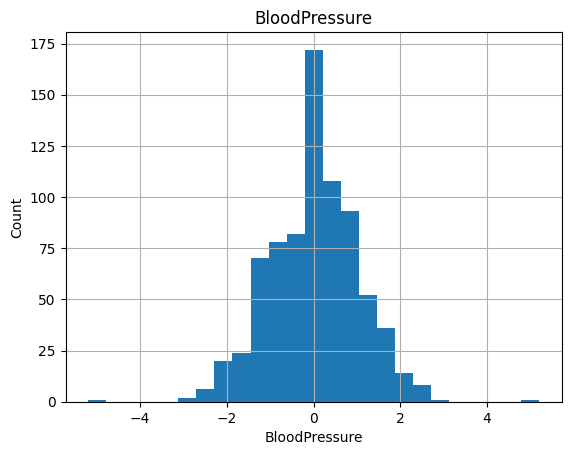

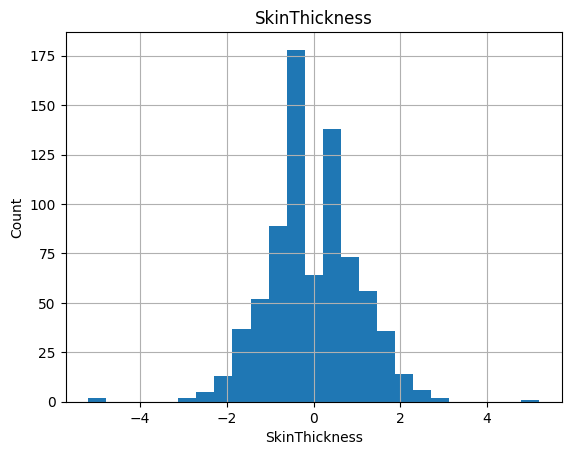

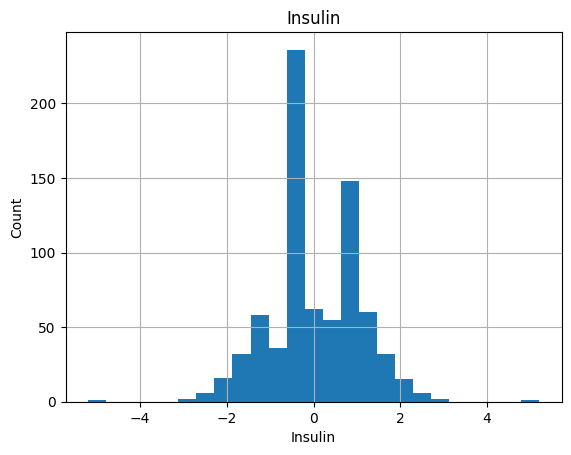

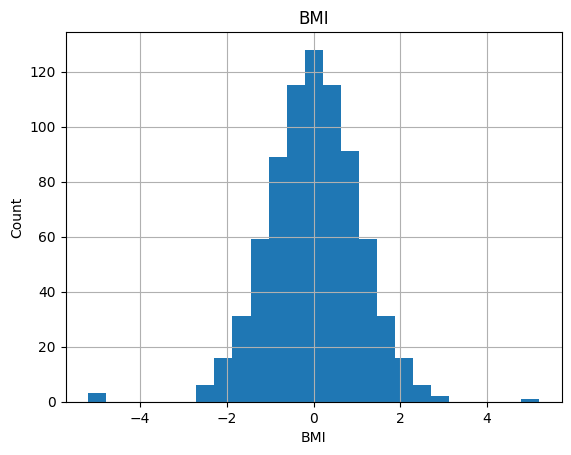

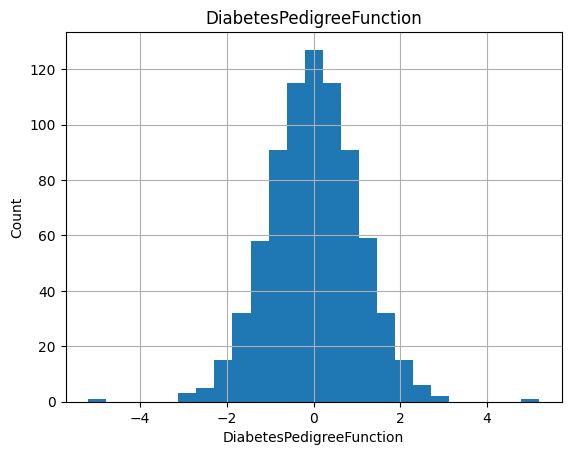

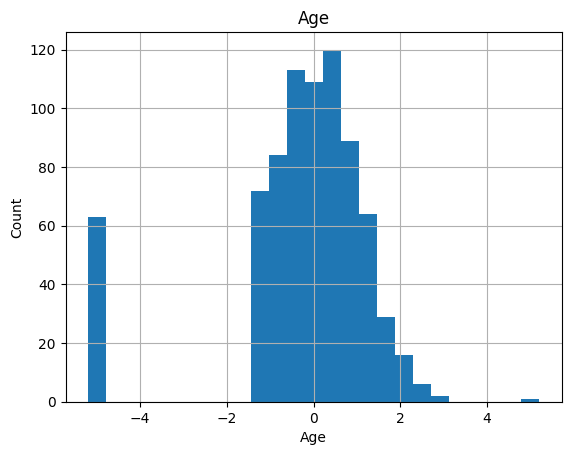

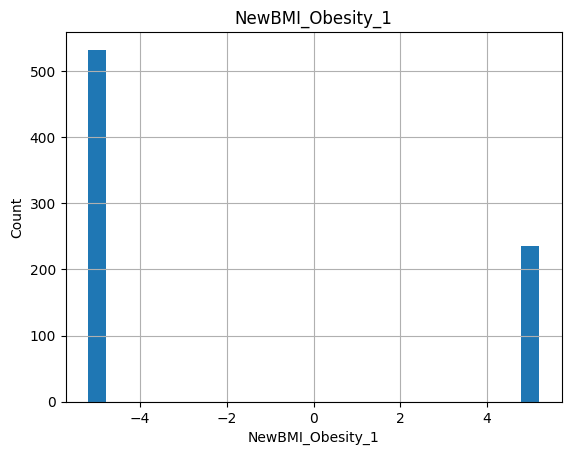

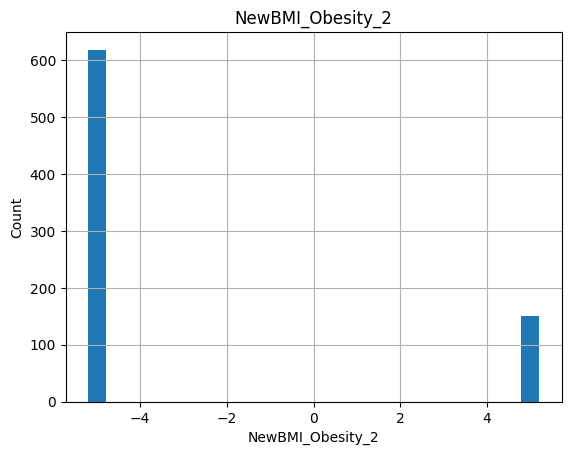

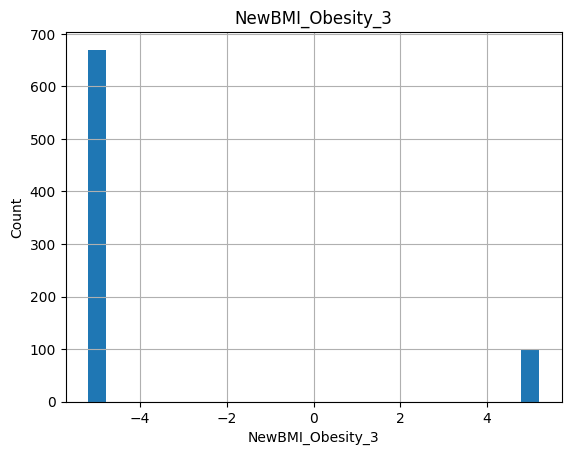

In [218]:
qt = QuantileTransformer(output_distribution='normal')
for feature in df.columns:
    if feature not in ['Outcome','Pregnancies','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight']:
      
        df[feature] = qt.fit_transform(df[[feature]])
        df[feature].hist(bins=25)
        plt.title(feature)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()

In [219]:
# Save the quantile transformer to a file
with open('E:\Multiple Disease Prediction\Saved Quantile Transformer\diabetes_quantile.pkl', 'wb') as file:
    pickle.dump(qt, file)

##### Outliers

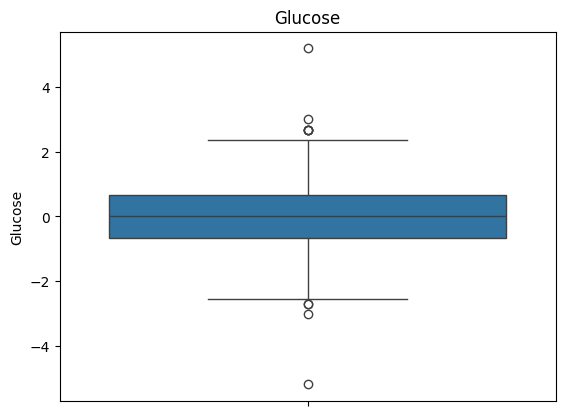

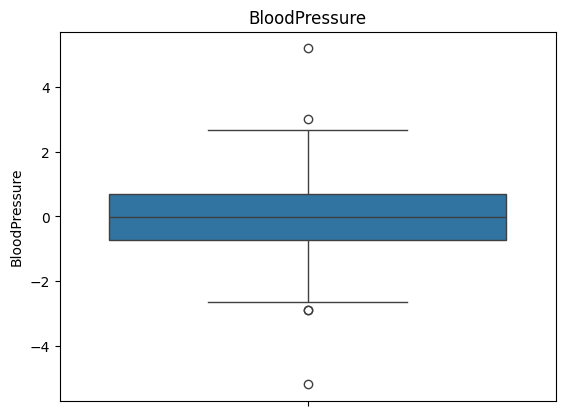

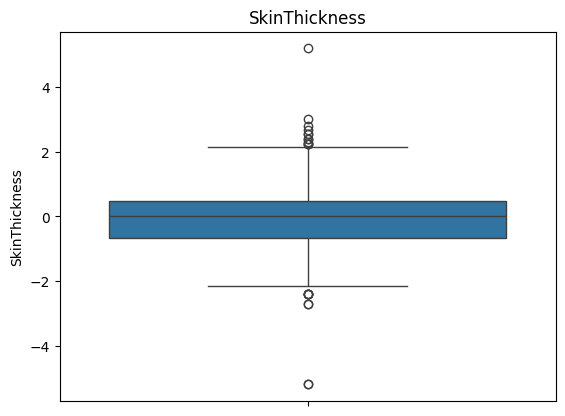

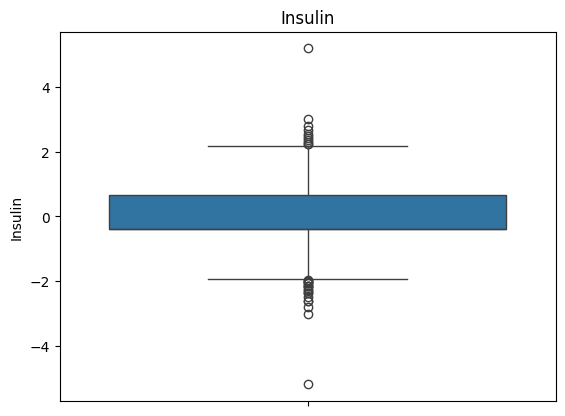

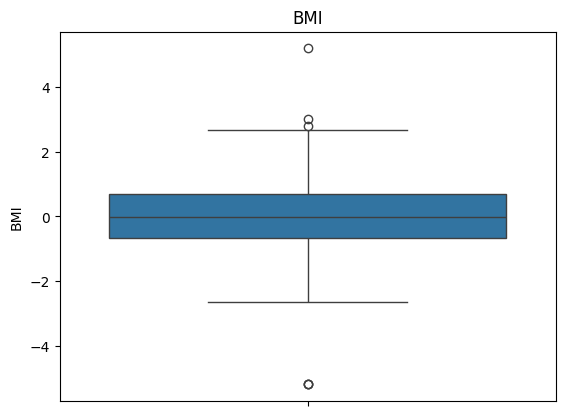

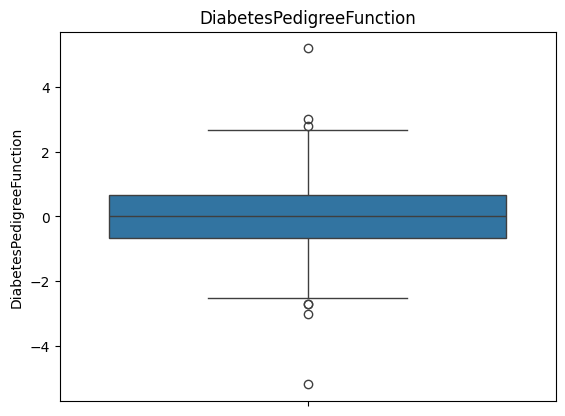

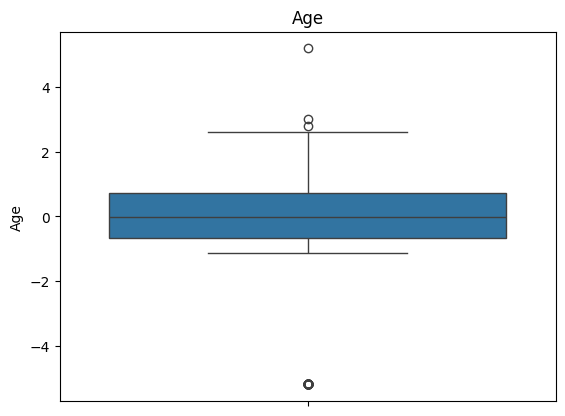

In [220]:
for feature in df.columns:
    if feature not in ['Pregnancies','Outcome','NewBMI_Obesity_1','NewBMI_Obesity_2', 'NewBMI_Obesity_3', 'NewBMI_Overweight','NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight']:
        sns.boxplot(df, y = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Feature Scaling

In [221]:
categorical_df = df[['Pregnancies','Outcome', 'NewBMI_Obesity_1',
       'NewBMI_Obesity_2', 'NewBMI_Obesity_3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight']]

In [222]:
feature_scale = [feature for feature in df.columns if feature not in categorical_df]

In [223]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity_1,NewBMI_Obesity_2,NewBMI_Obesity_3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,6.0,0.879002,-0.009804,0.848159,0.663249,0.225768,0.677570,1.225627,1,5.199338,-5.199338,-5.199338,0,0,0,0,0,0
1,1.0,-1.333008,-0.553118,0.073599,-0.385144,-0.795477,-0.060497,0.147598,0,-5.199338,-5.199338,-5.199338,1,0,1,0,1,0
2,8.0,1.716615,-0.727771,0.462019,0.663249,-1.421574,0.779878,0.215722,1,-5.199338,-5.199338,-5.199338,0,0,0,0,0,0
3,1.0,-1.152728,-0.553118,-0.806738,-0.933199,-0.570338,-1.246676,-5.199338,0,-5.199338,-5.199338,-5.199338,1,0,1,0,1,0
4,5.0,0.579978,-2.561229,0.848159,0.395725,1.453722,2.793437,0.269580,1,-5.199338,-5.199338,5.199338,0,0,0,0,0,0


In [224]:
scaler = StandardScaler()
scaler.fit(df[feature_scale])

StandardScaler()

In [225]:
# Save the scaler to a file
with open('E:\Multiple Disease Prediction\Saved Scalers\diabetes_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [226]:
# transform the dataset and add the Id and SalePrice columns
df = pd.concat([df[['Pregnancies','Outcome', 'NewBMI_Obesity_1',
       'NewBMI_Obesity_2', 'NewBMI_Obesity_3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight']].reset_index(drop=True), pd.DataFrame(scaler.transform(df[feature_scale]), columns = feature_scale)], axis = 1)

In [227]:
df.head()

,Pregnancies,Outcome,NewBMI_Obesity_1,NewBMI_Obesity_2,NewBMI_Obesity_3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,1,5.199338,-5.199338,-5.199338,0,0,0,0,0,0,0.855885,-0.010495,0.823372,0.653087,0.220475,0.660229,0.882177
1,1.0,0,-5.199338,-5.199338,-5.199338,1,0,1,0,1,0,-1.299328,-0.541246,0.073275,-0.382844,-0.752666,-0.059151,0.246360
2,8.0,1,-5.199338,-5.199338,-5.199338,0,0,0,0,0,0,1.671991,-0.711861,0.449428,0.653087,-1.349272,0.759947,0.286539
3,1.0,0,-5.199338,-5.199338,-5.199338,1,0,1,0,1,0,-1.123677,-0.541246,-0.779257,-0.924383,-0.538132,-1.215297,-2.907242
4,5.0,1,-5.199338,-5.199338,5.199338,0,0,0,0,0,0,0.564538,-2.502926,0.823372,0.388743,1.390589,2.722525,0.318304


In [228]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [229]:
X.head()

,Pregnancies,NewBMI_Obesity_1,NewBMI_Obesity_2,NewBMI_Obesity_3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,5.199338,-5.199338,-5.199338,0,0,0,0,0,0,0.855885,-0.010495,0.823372,0.653087,0.220475,0.660229,0.882177
1,1.0,-5.199338,-5.199338,-5.199338,1,0,1,0,1,0,-1.299328,-0.541246,0.073275,-0.382844,-0.752666,-0.059151,0.246360
2,8.0,-5.199338,-5.199338,-5.199338,0,0,0,0,0,0,1.671991,-0.711861,0.449428,0.653087,-1.349272,0.759947,0.286539
3,1.0,-5.199338,-5.199338,-5.199338,1,0,1,0,1,0,-1.123677,-0.541246,-0.779257,-0.924383,-0.538132,-1.215297,-2.907242
4,5.0,-5.199338,-5.199338,5.199338,0,0,0,0,0,0,0.564538,-2.502926,0.823372,0.388743,1.390589,2.722525,0.318304


### Train-Test Split

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

### Model Training

##### Logistic Regression

In [231]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict =  lr.predict(X_test)
lr_score = accuracy_score(lr_predict, y_test)
print(lr_score)

0.8441558441558441


##### Decision Tree Classifier

In [232]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)
DT_acc = accuracy_score(y_test, DT_pred)
DT_acc

0.8701298701298701

In [233]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7], 
    'min_samples_split':[1,2,3,5,7], 
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']},
             verbose=1)

In [234]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 3,
 'splitter': 'best'}

In [235]:
grid_search_dt.best_score_

0.8776923076923075

In [236]:
DT = grid_search_dt.best_estimator_
DT_pred = DT.predict(X_test)
DT_acc = accuracy_score(DT_pred, y_test)
DT_acc

0.7662337662337663

##### SVM Classifier

In [237]:
svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [238]:
grid_search.best_params_

{'C': 20, 'gamma': 0.001}

In [239]:
grid_search.best_score_

0.8615620418499267

In [240]:
svc = SVC(C=20, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, svc_pred)
svc_acc

0.8246753246753247

##### K-Nearest Neighbour Classifier

In [241]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_score = accuracy_score(y_test, y_pred)
knn_score

0.7987012987012987

##### Gradient Boosting Classifier

In [242]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [243]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}

In [244]:
grid_search_gbc.best_score_

0.8794553146483342

In [245]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=150)

In [246]:
gbc = grid_search_gbc.best_estimator_
y_pred = gbc.predict(X_test)
gbc_acc = accuracy_score(y_test, y_pred)
gbc_acc


0.8831168831168831

##### XG Boost Classifier

In [247]:
from xgboost import XGBClassifier 
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [248]:
y_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred)
xgb_acc


0.8896103896103896

##### Random Forest Classifier

In [249]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [250]:
y_pred = rand_clf.predict(X_test)
rand_acc = accuracy_score(y_test, y_pred)
rand_acc

0.8766233766233766

In [251]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(lr_score,4), 100*round(knn_score,4), 100*round(svc_acc,4), 100*round(DT_acc,4), 100*round(rand_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
6,XgBoost,88.96
5,Gradient Boosting Classifier,88.31
4,Random Forest Classifier,87.66
0,Logistic Regression,84.42
2,SVM,82.47
1,KNN,79.87
3,Decision Tree Classifier,76.62


### Selecting the Model


In [252]:
model = xgb

### Saving the Model

In [253]:
filename = 'E:\Multiple Disease Prediction\Saved Models\diabetes_model.sav'
pickle.dump(model,open(filename,'wb'))